In [1]:
from utils import make_nice_plots
from mock_event_maker import MockEvent
from mock_catalog_maker import MockCatalog
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import json
import sys
from tqdm import tqdm

make_nice_plots()


### Setup all dictionaries for population priors and hyperparameters

The hyperparameter dictionaries are in .json format and should contain all possible hyperparameters as keys. The values only matter for the population params used in the simulation. The models for the AGN and ALT hypotheses are chosen from the options in `priors.py`.

In [2]:
with open("hyperparam_agn.json", "r") as file:
    hyperparam_dict_agn = json.load(file)
with open("hyperparam_alt.json", "r") as file:
    hyperparam_dict_alt = json.load(file)

model_dict = {
            'agn': ['PrimaryMass-gaussian'], 
            'alt': ['PrimaryMass-gaussian']
        }

# model_dict = {
#             'agn': ['PrimaryMass-gaussian'], 
#             'alt': ['PrimaryMass-powerlaw-gaussian']
#         }

### Set global parameters needed for generating mock GWs

In [44]:
# For catalog
N_AGN = int(1e3)        # Number of AGN in catalog
MAX_REDSHIFT = 2      # Redshift up to which AGNs are generated
GEN_GWS_UP_TO_Z = 2   # Redshift up to which GWs are generated
COMPLETENESS = 1.       # Detection fraction of AGNs in the catalog

# For GWs
N_EVENTS = int(1e4)     # Number of GWs in dataset
F_AGN = 0.5             # Fraction of GWs coming from AGN
CL = 0.9              # Localization volume confidence level


### Make AGN catalog and generate GWs

In [45]:
Catalog = MockCatalog(
                    n_agn=N_AGN,
                    max_redshift=MAX_REDSHIFT,
                    gw_box_radius=GEN_GWS_UP_TO_Z,
                    completeness=COMPLETENESS
                )


No redshift bins specified, therefore assuming a uniform catalog.
Distributing 1000 sources in the bin r = [0, np.float64(5310.588303720892)].
Distributing 0 sources in the bin r = [np.float64(5310.588303720892), np.float64(5310.588303720892)].
Spherical coordinates added to catalog
Cartesian coordinates added to catalog
Redshifts and errors added to catalog
Measured redshifts added to catalog
Detected AGN added to catalog


In [49]:
GWEvents = MockEvent(
                    model_dict=model_dict,
                    n_events=N_EVENTS,
                    f_agn=F_AGN,
                    use_skymaps=True,
                    hyperparam_dict_agn=hyperparam_dict_agn,
                    hyperparam_dict_alt=hyperparam_dict_alt,
                    catalog=Catalog, 
                    skymap_cl=CL
                )

_ = GWEvents.get_posteriors()

#################### FAGN = 0 EVENTS WITH SKYMAPS ####################
# GWEvents = MockEvent.with_skymaps_without_agn(
#                                             n_events=N_EVENTS,
#                                             zmax=GEN_GWS_UP_TO_Z,  # We do not pass a catalog, but the max redshift must still be specified
#                                             skymap_cl=CL
#                                         )
######################################################################

#################### GW EVENTS WITHOUT SKYMAPS ####################
# events = MockEvent.without_skymaps(
#                                 n_events=N_EVENTS,
#                                 f_agn=F_AGN,
#                                 zmax=GEN_GWS_UP_TO_Z,  # We do not pass a catalog, but the max redshift must still be specified
#                                 model_dict=model_dict,
#                                 hyperparam_dict_agn=hyperparam_dict_agn,
#                                 hyperparam_dict_alt=hyperparam_dict_alt,
#                             )
###################################################################### 


Generating true GW sky positions...
Confirming: 10000 Skymaps have been generated with CL = 0.9

Got the population priors on ['mass_1_source'], modelled as `['PrimaryMass-gaussian']` for AGN and `['PrimaryMass-gaussian']` for ALT.

Generating true GW intrinsic parameter values...
Done.

Generating sky localization...
Done.

Generating intrinsic parameter posteriors...
Done.


In [25]:
# x = 1e6
# smaller_than_x = GWEvents.properties['loc_vol'].to_numpy() < x
# drop_from = int(np.sum(smaller_than_x) % 100)
# print(drop_from, np.sum(smaller_than_x))
# GWEvents.properties.drop(GWEvents.properties[smaller_than_x].index[drop_from:], inplace=True)
# GWEvents.posteriors.drop(GWEvents.posteriors[smaller_than_x].index[drop_from:], inplace=True)

# GWEvents.n_events = len(GWEvents.properties)
# print(GWEvents.n_events)

### All true values are stored in MockEvents.properties


In [50]:
GWEvents.properties.head()

,x,y,z,r,theta,phi,redshift,from_agn,sigma,loc_vol,loc_rad,mass_1_source,x_meas_center,y_meas_center,z_meas_center,r_meas_center,theta_meas_center,phi_meas_center,redshift_meas_center
0,-3627.481459,1941.747481,2239.049008,4684.265735,1.072427,2.650115,1.613174,True,111.294209,9.025496e+07,278.266431,13.350734,-3514.640631,1935.592211,2195.050074,4573.006069,1.070252,2.638679,1.551598
1,1155.295795,2396.158104,1039.036815,2855.850055,1.198423,1.121534,0.796925,True,24.031992,9.087045e+05,60.086655,14.393755,1153.810378,2402.680457,1031.800415,2857.284834,1.201498,1.123257,0.797436
2,-1806.585181,2052.654223,-2970.816115,4037.683465,2.397603,2.292520,1.280402,True,64.519794,1.758459e+07,161.317403,11.729289,-1927.573721,2085.441779,-3043.015012,4166.311363,2.391106,2.318033,1.342043
3,-37.679699,-2241.350197,-3212.654174,3917.424831,2.532371,-1.587606,1.224609,True,59.508753,1.379736e+07,148.788409,12.498027,-110.111297,-2214.897318,-3208.772232,3901.221252,2.536544,-1.620619,1.217222
4,3303.751804,1544.973220,-1050.632216,3795.463909,1.851272,0.437428,1.169750,True,53.905404,1.025534e+07,134.778480,12.007187,3330.137036,1543.502500,-1132.463946,3840.147838,1.870149,0.434789,1.189653


In [51]:
# These are handy masks
agn_events = (GWEvents.properties['from_agn'] == True)
alt_events = ~agn_events  # or (GWEvents.properties['from_agn'] == False)

### Let's look at these posteriors

MockEvents.posteriors is a pandas DataFrame where the columns contain the event parameters and the rows contain the GW events. Each element in the DataFrame is a list of posterior samples. The default is 1000 samples.

In [52]:
GWEvents.posteriors.head()

,x,y,z,r,theta,phi,redshift,mass_1_source
0,"[-3512.9898911756586, -3661.146228138185, -343...","[1756.5939152921483, 2137.035172760792, 1914.4...","[2134.7836938321593, 2187.794782311872, 2200.4...","[4470.34915618405, 4770.467172399183, 4507.222...","[1.0729402787533258, 1.0943633976077398, 1.060...","[2.677922506843741, 2.6132397599241908, 2.6332...","[1.496471580899401, 1.6622481026590707, 1.5160...","[15.527446214350563, 17.457445107920154, 14.11..."
1,"[1127.836870753688, 1140.3090319229088, 1127.3...","[2389.762360436775, 2437.2289249940386, 2382.4...","[1034.7688537847994, 1013.686054208907, 1081.4...","[2837.9088651954494, 2875.4041346583235, 2849....","[1.1975676687522965, 1.2105156562926245, 1.181...","[1.1298433836570332, 1.133180563495796, 1.1288...","[0.7905489589360011, 0.8039030637566961, 0.794...","[15.336374771845577, 13.80216774830184, 15.908..."
2,"[-1975.8053111080633, -1976.5968556730027, -20...","[2090.33339690496, 2133.40870997255, 2082.9865...","[-2924.914739460453, -3044.2694867607183, -304...","[4102.246527298435, 4210.2190633820355, 4219.8...","[2.364568388654284, 2.3790279754199295, 2.3784...","[2.328035634374152, 2.3180593033517205, 2.3462...","[1.3110813318873609, 1.363569302429767, 1.3683...","[4.350916605191957, 8.507832685144532, 10.0729..."
3,"[-158.83632813077955, -160.25955371211296, -11...","[-2264.6543847957914, -2200.186273789059, -226...","[-3203.7616025618017, -3120.423960493914, -324...","[3926.57317106892, 3821.45894353849, 3960.5042...","[2.525111466794261, 2.5262107611166384, 2.5313...","[-1.640818774904211, -1.6435070030179957, -1.6...","[1.2287925532476434, 1.1813012831496772, 1.244...","[8.522058768424758, 10.819036999581908, 9.2068..."
4,"[3390.6818963619917, 3422.2394684315855, 3221....","[1565.9966170759744, 1538.6981858505915, 1565....","[-1085.2641638210982, -1177.84058546158, -1201...","[3889.3273753034287, 3932.762836885957, 3778.0...","[1.8535869008883983, 1.8749590492570776, 1.894...","[0.43266704969601183, 0.42253565514098335, 0.4...","[1.2118194539171476, 1.2316288984652426, 1.162...","[15.745598268820753, 18.260756935782435, 18.11..."


In [53]:
primary_mass_posteriors = np.vstack(GWEvents.posteriors['mass_1_source'])  # Make 2D array of shape (n_gws, n_samples)


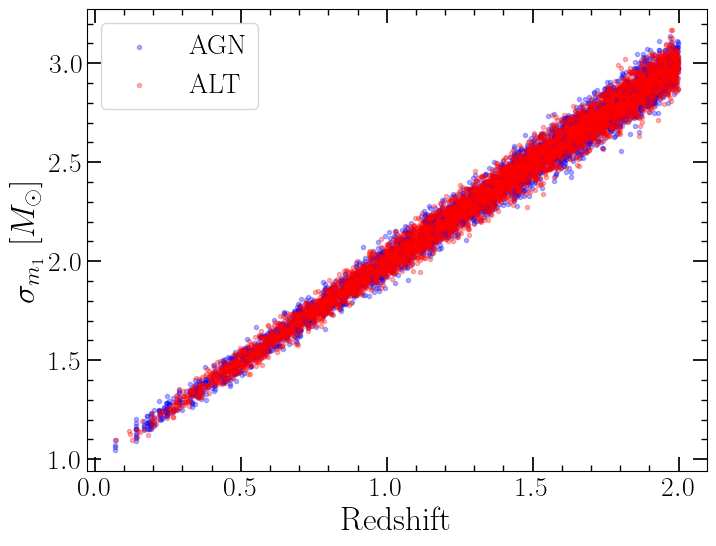

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(GWEvents.properties['redshift'][agn_events], np.std(primary_mass_posteriors[agn_events, :], axis=1), marker='.', color='blue', alpha=0.3, label='AGN')
ax.scatter(GWEvents.properties['redshift'][alt_events], np.std(primary_mass_posteriors[alt_events, :], axis=1), marker='.', color='red', alpha=0.3, label='ALT')
ax.set_xlabel('Redshift')
ax.set_ylabel(r'$\sigma_{m_{1}}$' + r' $\left[M_{\odot}\right]$')
ax.legend()
plt.show()


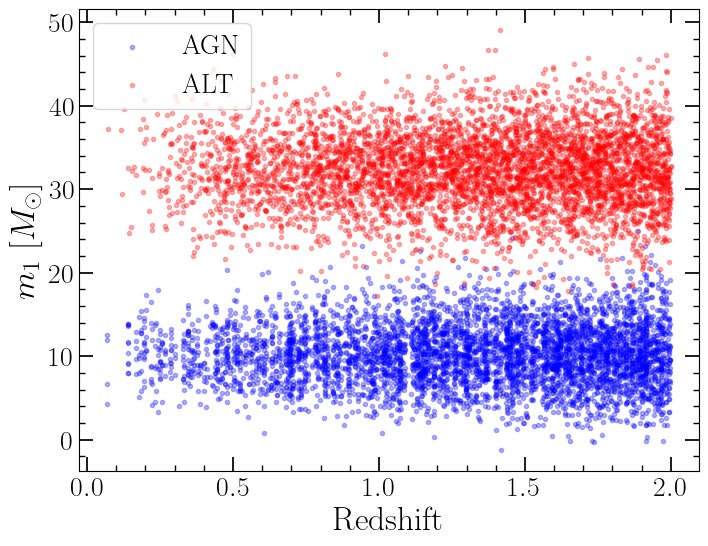

In [55]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(GWEvents.properties['redshift'][agn_events], np.median(primary_mass_posteriors[agn_events, :], axis=1), marker='.', color='blue', alpha=0.3, label='AGN')
ax.scatter(GWEvents.properties['redshift'][alt_events], np.median(primary_mass_posteriors[alt_events, :], axis=1), marker='.', color='red', alpha=0.3, label='ALT')
ax.set_xlabel('Redshift')
ax.set_ylabel(r'$m_{1}$' + r' $\left[M_{\odot}\right]$')
ax.legend()
plt.show()


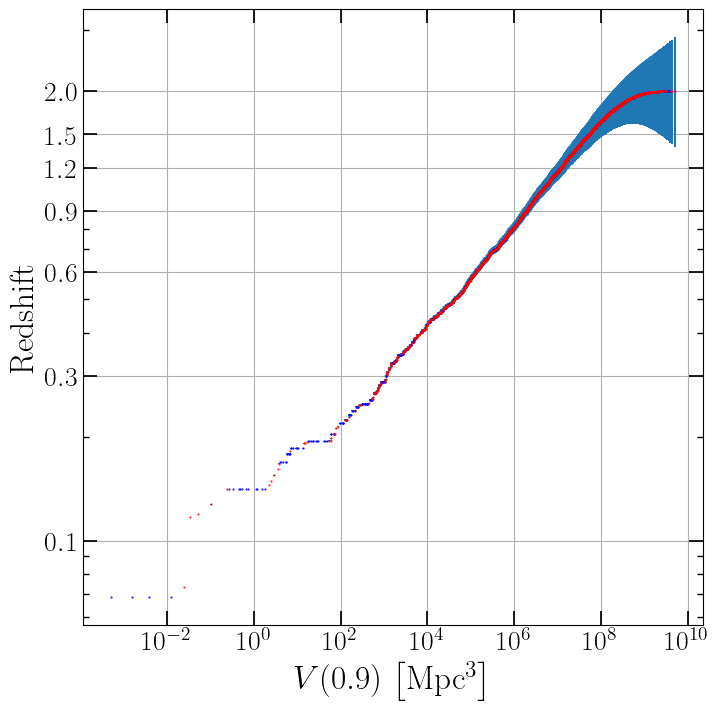

In [56]:
from utils import fast_z_at_value
import astropy.units as u

upper_comdist_limit = np.array(GWEvents.properties['r'] + GWEvents.properties['loc_rad'])
lower_comdist_limit = np.array(GWEvents.properties['r'] - GWEvents.properties['loc_rad'])
upper_z_limit = fast_z_at_value(GWEvents.cosmo.comoving_distance, upper_comdist_limit * u.Mpc)
lower_z_limit = fast_z_at_value(GWEvents.cosmo.comoving_distance, lower_comdist_limit * u.Mpc)

upper_z_error = upper_z_limit - GWEvents.properties['redshift'].to_numpy()
lower_z_error = GWEvents.properties['redshift'].to_numpy() - lower_z_limit
z_errors = np.array([lower_z_error, upper_z_error])

fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(GWEvents.properties['loc_vol'], GWEvents.properties['redshift'], yerr=z_errors, linestyle='')
ax.scatter(GWEvents.properties['loc_vol'][agn_events], GWEvents.properties['redshift'][agn_events], marker='.', color='blue', zorder=3, s=1)
ax.scatter(GWEvents.properties['loc_vol'][alt_events], GWEvents.properties['redshift'][alt_events], marker='.', color='red', zorder=3, s=1)
ax.set_ylabel('Redshift')
ax.set_xlabel(f'$V({GWEvents.skymap_cl})$' + r' $\left[\mathrm{Mpc^{3}}\right]$')
ax.loglog()
ax.set_yticks([0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 2])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid()
plt.show()


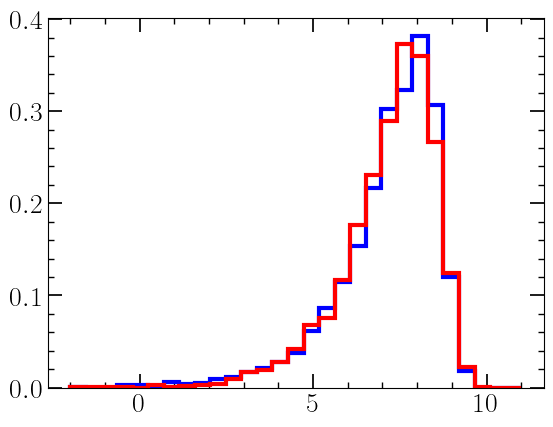

In [57]:
bins=np.linspace(-2, 11, 30)

plt.figure()
plt.hist(np.log10(GWEvents.properties['loc_vol'].loc[GWEvents.properties['from_agn']==True]), density=True, histtype='step', color='blue', linewidth=3, bins=bins)
plt.hist(np.log10(GWEvents.properties['loc_vol'].loc[GWEvents.properties['from_agn']==False]), density=True, histtype='step', color='red', linewidth=3, bins=bins)
plt.show()


### If only $f_{\rm agn}$ is inferred, we can precompute the probabilities of the AGN and ALT hypotheses

The hierarchical likelihood is given by
\begin{equation}
    p(D|\Lambda) = \prod_{i}^{N_{\rm gw}} \frac{1}{\alpha(\Lambda)} \int \mathrm{d} \theta \, p(d_i | \theta) p_{\rm pop}(\theta | \Lambda) \, .
\end{equation}

Just focussing on the primary mass of a single GW and ignoring selection effects,
\begin{equation}
    p(d|\Lambda) = \int \mathrm{d} m_{1} \, p(d | m_{1}) p_{\rm pop}(m_{1} | \Lambda) \, ,
\end{equation}
and converting the event likelihood to the event posterior,
\begin{equation}
    p(d|\Lambda) = \int \mathrm{d} m_{1} \, \frac{p(d)}{\pi_{\rm PE}(m_{1})} p(m_{1} | d) p_{\rm pop}(m_{1} | \Lambda) \, .
\end{equation}

We assume $p_{\rm pop}(m_{1} | \Lambda)$ to be known exactly (but we have to do inference at a later stage)! The posteriors $p(m_{1} | d)$ are measured/simulated, the evidence $p(d)$ is irrelevant and the parameter estimation prior $\pi_{\rm PE}(m_{1})$ is [UNIFORM?]


We sample a subset of GWs from the total pool to do our analysis. This is in general recommended in order to save computation time.

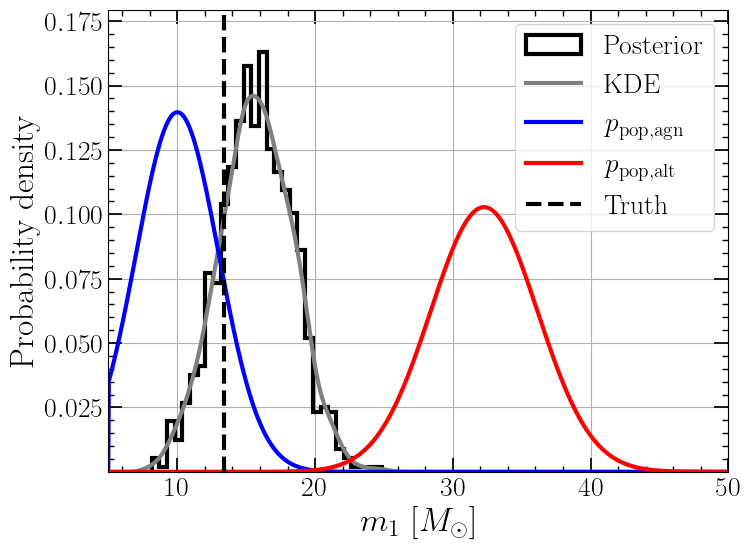

In [58]:
# Example for a single GW

from scipy.stats import gaussian_kde as kde
from scipy.integrate import quad

intrinsic_param_posterior = np.array(GWEvents.posteriors['mass_1_source'].iloc[0])
intrinsic_param_kde = kde(intrinsic_param_posterior)

xmin = min(GWEvents.hyperparam_dict_agn['mminbh']['value'], GWEvents.hyperparam_dict_alt['mminbh']['value'])
# xmax = max(GWEvents.hyperparam_dict_agn['mmaxbh']['value'], GWEvents.hyperparam_dict_alt['mmaxbh']['value'])
xmax = 50
xx = np.linspace(xmin, xmax, 1000)
plt.figure(figsize=(8,6))
h, _, _ = plt.hist(intrinsic_param_posterior, density=True, bins=30, histtype='step', linewidth=3, color='black', label='Posterior')
plt.plot(xx, intrinsic_param_kde(xx), color='grey', linewidth=3, label='KDE')
for Model in GWEvents.agn_models:
    population_prior_agn = Model.joint_prob(xx)
    plt.plot(xx, population_prior_agn, color='blue', linewidth=3, label=r'$p_{\rm pop, agn}$')
for Model in GWEvents.alt_models:
    population_prior_alt = Model.joint_prob(xx)
    plt.plot(xx, population_prior_alt, color='red', linewidth=3, label=r'$p_{\rm pop, alt}$')
ymin, ymax = 1e-5, 1.1 * np.max(h)  # Assuming histogram is highest point
plt.vlines(GWEvents.properties['mass_1_source'].iloc[0], ymin, ymax, linestyle='dashed', linewidth=3, color='black', label='Truth')
plt.xlabel(r'$m_{1}$' + r' $\left[M_{\odot}\right]$')
plt.ylabel('Probability density')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# plt.semilogy()
plt.legend()
plt.grid()
plt.show()


In [ ]:
# from concurrent.futures import ThreadPoolExecutor

# xx = np.linspace(xmin, xmax, 1000)

# agn_probs = np.ones(GWEvents.n_events)
# alt_probs = np.ones(GWEvents.n_events)

# def compute_probs(i):
#     agn_prob = 1.0
#     alt_prob = 1.0

#     for Model in GWEvents.agn_models:
#         intrinsic_param_posterior = np.array(GWEvents.posteriors[Model.param_label].iloc[i])[0]
#         intrinsic_param_kde = kde(intrinsic_param_posterior)
#         population_prior_times_posterior = lambda x: Model.joint_prob(np.atleast_1d(x)) * intrinsic_param_kde(x)
#         agn_prob *= quad(population_prior_times_posterior, xmin, xmax)[0]

#     for Model in GWEvents.alt_models:
#         intrinsic_param_posterior = np.array(GWEvents.posteriors[Model.param_label].iloc[i])[0]
#         intrinsic_param_kde = kde(intrinsic_param_posterior)
#         population_prior_times_posterior = lambda x: Model.joint_prob(np.atleast_1d(x)) * intrinsic_param_kde(x)
#         alt_prob *= quad(population_prior_times_posterior, xmin, xmax)[0]

#     return i, agn_prob, alt_prob

# # Use threads instead of processes
# with ThreadPoolExecutor(max_workers=6) as executor:
#     results = list(tqdm(executor.map(compute_probs, range(GWEvents.n_events)), total=GWEvents.n_events))

# # Store results in the original arrays
# for i, agn_prob, alt_prob in results:
#     agn_probs[i] = agn_prob
#     alt_probs[i] = alt_prob


  3%|▎         | 264/10000 [00:21<13:04, 12.41it/s]


KeyboardInterrupt: 

In [59]:
# xx = np.linspace(xmin, xmax, 1000)

# agn_probs = np.ones(GWEvents.n_events)
# alt_probs = np.ones(GWEvents.n_events)
# for i, event in tqdm(enumerate(range(GWEvents.n_events))):

#     for Model in GWEvents.agn_models:
#         intrinsic_param_posterior = np.array(GWEvents.posteriors[Model.param_label].iloc[i])[0]
#         intrinsic_param_kde = kde(intrinsic_param_posterior)
#         population_prior_times_posterior = lambda x: Model.joint_prob(np.atleast_1d(x)) * intrinsic_param_kde(x)

#         agn_probs[i] *= quad(population_prior_times_posterior, xmin, xmax)[0]  # TODO: Make this log probs and rethink integration, also integral must be ndim in case of joint pdfs

#     for Model in GWEvents.alt_models:
#         intrinsic_param_posterior = np.array(GWEvents.posteriors[Model.param_label].iloc[i])[0]
#         intrinsic_param_kde = kde(intrinsic_param_posterior)
#         population_prior_times_posterior = lambda x: Model.joint_prob(np.atleast_1d(x)) * intrinsic_param_kde(x)

#         alt_probs[i] *= quad(population_prior_times_posterior, xmin, xmax)[0]  # TODO: Make this log probs and rethink integration, also integral must be ndim in case of joint pdfs


# # agn_probs = np.load('pagn.npy')
# # alt_probs = np.load('palt.npy')


In [18]:
# fig, ax = plt.subplots(figsize=(10, 10))
# xmin, xmax = -3, 0
# xx = np.logspace(xmin, xmax, 100)
# ax.plot(xx, xx, linestyle='dashed', color='black', zorder=6)
# ax.scatter(alt_probs[agn_events], agn_probs[agn_events], color='blue', alpha=0.3, marker='.', zorder=5, label='From AGN')
# ax.scatter(alt_probs[alt_events], agn_probs[alt_events], color='red', alpha=0.3, marker='.', zorder=5, label='From ALT')
# ax.set_xlabel(r'$p_{\rm alt}$')
# ax.set_ylabel(r'$p_{\rm agn}$')
# ax.set_xlim(10**xmin, 10**xmax)
# ax.set_ylim(10**xmin, 10**xmax)
# ax.loglog()
# ax.legend()
# ax.grid()
# plt.show()


In [64]:
from utils import spherical2cartesian
from crossmatch import crossmatch, get_num_dens

get_num_dens(GWEvents, Catalog)

n_catalog_resamps = 100
agn_redshift_samps = Catalog.sample_agn_redshift_dists(n_catalog_resamps)

skyprobs = np.zeros(GWEvents.n_events)
n_in_map = np.zeros(GWEvents.n_events)
for i in tqdm(range(n_catalog_resamps)):
    samps = agn_redshift_samps[:,i]
    Catalog.complete_catalog['redshift_meas'] = samps
    Catalog.complete_catalog['r_meas'] = Catalog.cosmo.comoving_distance(samps).value

    x_meas, y_meas, z_meas = spherical2cartesian(Catalog.complete_catalog['r_meas'], Catalog.complete_catalog['theta_meas'], Catalog.complete_catalog['phi_meas'])
    Catalog.complete_catalog['x_meas'] = x_meas
    Catalog.complete_catalog['y_meas'] = y_meas
    Catalog.complete_catalog['z_meas'] = z_meas

    Catalog.incomplete_catalog = Catalog.complete_catalog.loc[Catalog.complete_catalog['detected'] == True]  # Update the incomplete catalog
    
    pagn_sky, _, n_agn_in_skymap, _ = crossmatch(MockCatalog=Catalog, MockEvents=GWEvents, use_intrinsic_params=False, true_agn_pos=False)
    skyprobs += pagn_sky
    n_in_map += n_agn_in_skymap
skyprobs /= n_catalog_resamps
n_in_map /= n_catalog_resamps

skyprobs_samp, n_in_map_samp = skyprobs.copy(), n_in_map.copy()


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:04<00:00, 21.27it/s]


In [ ]:
from crossmatch import crossmatch, get_num_dens

get_num_dens(GWEvents, Catalog)

def crossmatch_n_times(n_catalog_resamps=100, true_agn_pos=False):
    skyprobs = np.zeros(GWEvents.n_events)
    n_in_map = np.zeros(GWEvents.n_events)
    for _ in tqdm(range(n_catalog_resamps)):
        Catalog.measure_redshift()  # TODO: Does not work in empty-cat case, but shouldn't be called then anyway
        pagn_sky, _, n_agn_in_skymap, _ = crossmatch(MockCatalog=Catalog, MockEvents=GWEvents, use_intrinsic_params=False, true_agn_pos=true_agn_pos)
        skyprobs += pagn_sky
        n_in_map += n_agn_in_skymap
    skyprobs /= n_catalog_resamps
    n_in_map /= n_catalog_resamps
    return skyprobs, n_in_map

skyprobs_samp, n_in_map_samp = crossmatch_n_times()
skyprobs_true, n_in_map_true = crossmatch_n_times(n_catalog_resamps=1, true_agn_pos=True)

print(n_in_map_true, n_in_map_samp)


100%|██████████| 1/1 [00:00<00:00, 54.45it/s]

[1. 1. 1. ... 0. 0. 1.] [0.56 0.48 0.05 ... 0.   0.04 1.06]


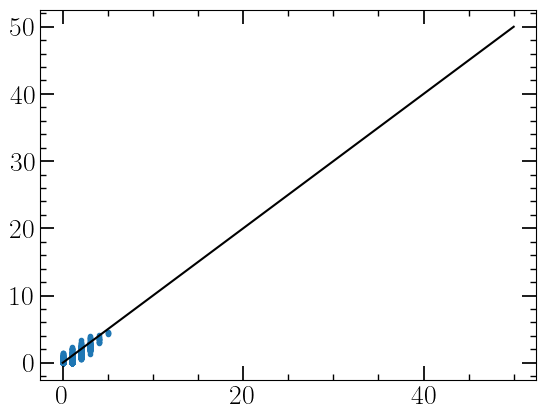

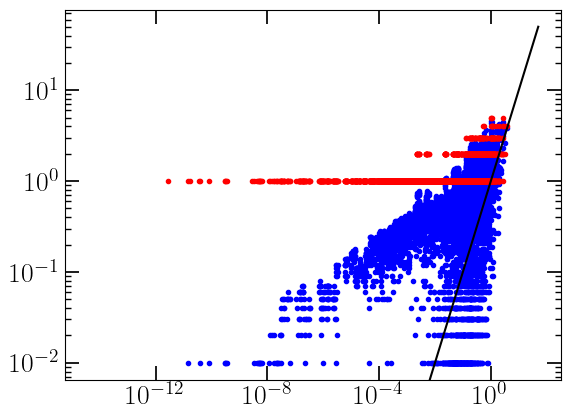

In [20]:
plt.figure()
plt.scatter(n_in_map_true, n_in_map_samp, marker='.')
plt.plot(np.linspace(0, 50, 10), np.linspace(0, 50, 10), color='black')
plt.show()

agn_num_dens = Catalog.n_agn / Catalog.cosmo.comoving_volume(Catalog.max_redshift).value  # Mpc^-3
agn_expected = agn_num_dens * GWEvents.properties['loc_vol']

plt.figure()
plt.scatter(agn_expected, n_in_map_samp, marker='.', color='blue')
plt.scatter(agn_expected, n_in_map_true, marker='.', color='red')
plt.plot(np.linspace(0, 50, 10), np.linspace(0, 50, 10), color='black')
plt.loglog()
plt.show()


In [65]:
skyprobs = skyprobs_samp.copy().to_numpy()

In [22]:
print(np.sum(skyprobs[skyprobs_true > 1e-5] > skyprobs_true[skyprobs_true > 1e-5]))
print(np.sum(skyprobs[skyprobs_true < 1e-5] > skyprobs_true[skyprobs_true < 1e-5]))

print(np.sum(skyprobs == 0))
print(np.sum(skyprobs_true == 0))

print(np.sum(skyprobs[skyprobs_true == 0] > 0))


41
2099
3532
5011
1485


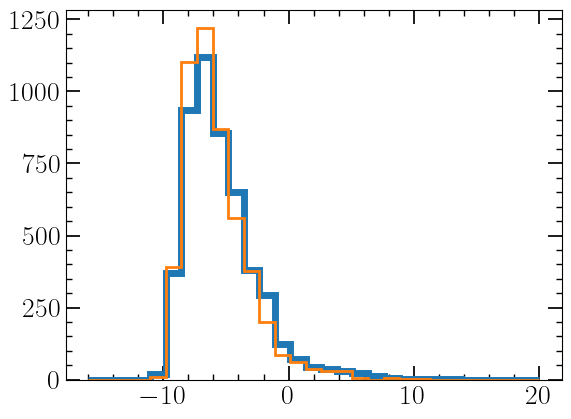

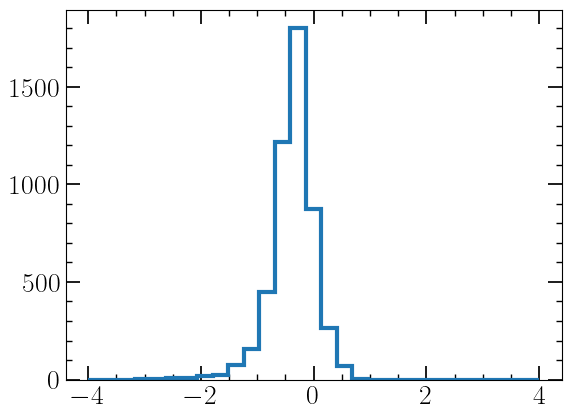

In [23]:
bins = np.linspace(-16, 20, 30)
plt.figure()
plt.hist(np.log10(skyprobs_true[(skyprobs_true != 0) & (skyprobs != 0)]), histtype='step', linewidth=5, bins=bins)
plt.hist(np.log10(skyprobs[(skyprobs_true != 0) & (skyprobs != 0)]), histtype='step', linewidth=2, bins=bins)
plt.show()

bins = np.linspace(-4, 4, 30)
plt.figure()
plt.hist(np.log10(skyprobs[(skyprobs_true != 0) & (skyprobs != 0)]) - np.log10(skyprobs_true[(skyprobs_true != 0) & (skyprobs != 0)]), histtype='step', linewidth=3, bins=bins)
plt.show()


In [24]:
# bins = np.arange(0, 25, 1)

# plt.figure(figsize=(8,6))
# plt.hist(n_agn_per_skymap[agn_events.to_numpy()], bins=bins, color='blue', histtype='step', linewidth=3)
# plt.hist(n_agn_per_skymap[alt_events.to_numpy()], bins=bins, color='red', histtype='step', linewidth=3)
# plt.show()


In [ ]:
# from utils import cartesian2spherical, spherical2cartesian
# from scipy.stats import truncnorm
# from crossmatch import kdtree_in_skymap

# N_trials = 1000  # We repeat the routine for generating a skymap posterior, only now to sample possible host-AGN locations

# # The measured skymap center is at redshift associated with a certain AGN redshift error -> use this single value per skymap as trial AGN redshift errors
# # TODO: try sampling from distribution distribution from zmin to zmax of skymap and make array of N_trials errors per GW
# # redshift_error = 0.01 * (1 + GWEvents.properties['redshift_meas_center'])**3  # As used in MockCatalog - should reflect AGN catalog used
# # redshift_error[redshift_error > 1] = 1
# # median_agn_zerrors_in_map = redshift_error.to_numpy()
# # redshift_errors = np.repeat(median_agn_zerrors_in_map[:,np.newaxis], N_trials, axis=1)  # Shape (n_events, N_trials)

# xyz_center = GWEvents.properties[['x_meas_center', 'y_meas_center', 'z_meas_center']].to_numpy()
# std = np.tile(GWEvents.properties['sigma'].to_numpy()[:, np.newaxis], 3)  # Same sigma for x, y and z

# loc_rad = GWEvents.properties['loc_rad'].to_numpy()
# z_low, z_high = 0, Catalog.max_redshift

# # TODO: VECTORIZE
# in_map_probs = np.zeros(GWEvents.n_events)
# for k in tqdm(range(GWEvents.n_events)):

#     xyz_trials = np.random.normal(loc=xyz_center[k,:], scale=std[k,:], size=(N_trials, 3))
#     x_trials, y_trials, z_trials = xyz_trials[:, 0], xyz_trials[:, 1], xyz_trials[:, 2]
#     r_trials, theta_trials, phi_trials = cartesian2spherical(x_trials, y_trials, z_trials)
#     redshift_trials = fast_z_at_value(GWEvents.cosmo.comoving_distance, r_trials * u.Mpc)

#     redshift_errors = np.minimum(0.01 * (1 + redshift_trials)**3, 1)

#     measure_redshift_N_times = 1  # TODO: check if this needs to be much higher
#     N_in_skymap = 0
#     for i in range(measure_redshift_N_times):
        
#         a, b = (z_low - redshift_trials) * redshift_errors**(-1), (z_high - redshift_trials) * redshift_errors**(-1) # redshift_errors[k,:]
#         redshift_meas = truncnorm.rvs(a, b, loc=redshift_trials, scale=redshift_errors)

#         r_meas = GWEvents.cosmo.comoving_distance(redshift_meas).value
#         theta_meas = theta_trials
#         phi_meas = phi_trials

#         xyz_meas = np.array(spherical2cartesian(r_meas, theta_meas, phi_meas)).T
#         in_skymap = kdtree_in_skymap(xyz_meas, xyz_center[k,:], loc_rad[k])  # Works for spherical mock volumes, will be challenging applying to real data...
#         N_in_skymap += len(in_skymap)

#     in_map_probs[k] = N_in_skymap / measure_redshift_N_times / N_trials

# print(in_map_probs)

# # DOES NOT RETURN CL IN CASE OF SMALL REDSHIFT ERRORS!! SOMETHING GOOES WRONG HERE!!!!!

# plt.figure(figsize=(8,6))
# plt.scatter(GWEvents.properties['loc_vol'].to_numpy(), in_map_probs, marker='.', color='black', alpha=0.3)
# plt.semilogx()
# plt.grid()
# plt.xlabel(f'$V({GWEvents.skymap_cl})$' + r' $\left[\mathrm{Mpc^{3}}\right]$')
# plt.ylabel('Host-in-map probability')
# plt.show()


In [66]:
sky_alt = np.array(GWEvents.skymap_cl / GWEvents.properties['loc_vol'])

NameError: name 'skyprobs_true' is not defined

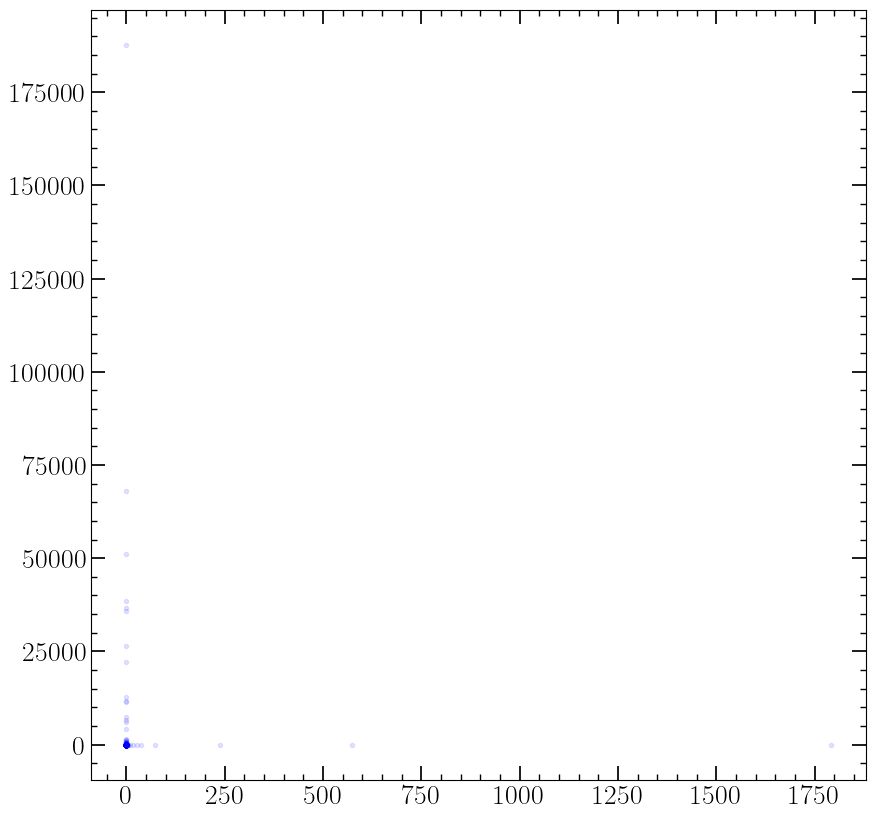

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
xmin = -10
xmax = -4
xx = np.logspace(xmin, xmax, 100)
ax.plot(xx, xx, linestyle='dashed', color='black', zorder=6)
ax.scatter(sky_alt, skyprobs, color='blue', alpha=0.1, marker='.', zorder=5, label='with error')
ax.scatter(sky_alt, skyprobs_true, color='red', alpha=0.1, marker='.', zorder=5, label='w/o error')
# ax.scatter(p_alt, skyprobs_truepos, color='red', alpha=0.3, marker='.', zorder=4)
ax.set_xlabel(r'$p_{\rm alt}$')
ax.set_ylabel(r'$p_{\rm agn}$')
# ax.set_xlim(10**xmin, 10**xmax)
# ax.set_ylim(10**xmin, 10**xmax)
ax.loglog()
ax.legend()
ax.grid()
plt.show()

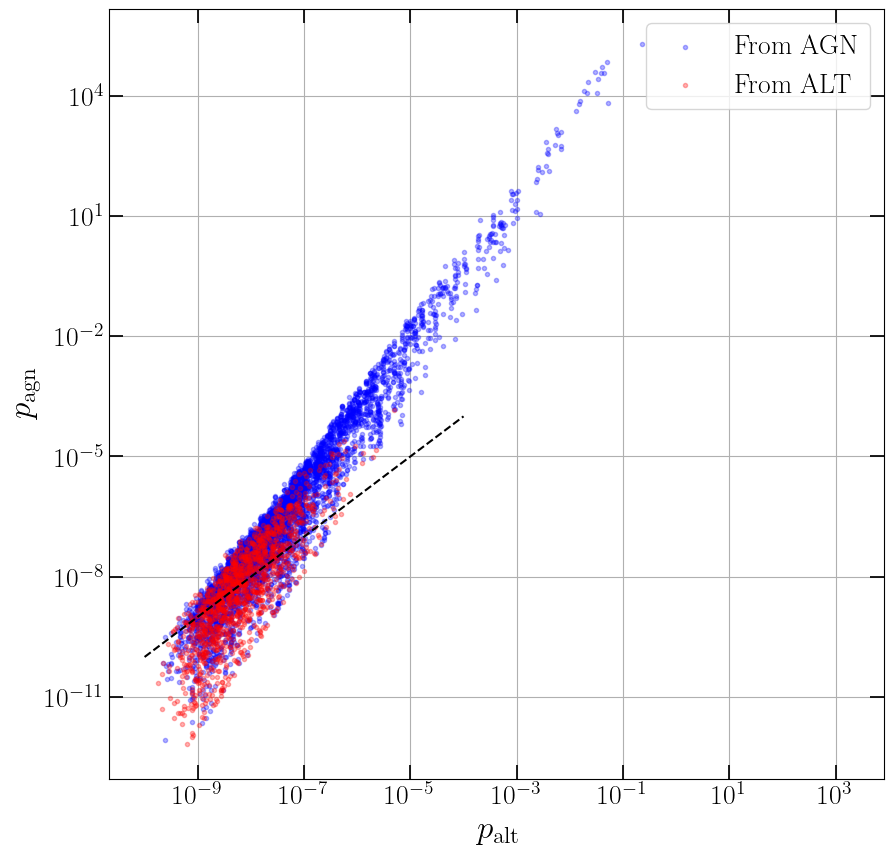

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))
xmin = -10
xmax = -4
xx = np.logspace(xmin, xmax, 100)
ax.plot(xx, xx, linestyle='dashed', color='black', zorder=6)
ax.scatter(sky_alt[agn_events], skyprobs[agn_events], color='blue', alpha=0.3, marker='.', zorder=5, label='From AGN')
ax.scatter(sky_alt[alt_events], skyprobs[alt_events], color='red', alpha=0.3, marker='.', zorder=5, label='From ALT')
# ax.scatter(p_alt, skyprobs_truepos, color='red', alpha=0.3, marker='.', zorder=4)
ax.set_xlabel(r'$p_{\rm alt}$')
ax.set_ylabel(r'$p_{\rm agn}$')
# ax.set_xlim(10**xmin, 10**xmax)
# ax.set_ylim(10**xmin, 10**xmax)
ax.loglog()
ax.legend()
ax.grid()
plt.show()


In [69]:
skyprobs = skyprobs_samp.copy().to_numpy()
# skyprobs[n_in_map_true != 0] *= (GWEvents.properties['agn_numdens'][n_in_map_true != 0] * GWEvents.properties['loc_vol'][n_in_map_true != 0])
# skyprobs[n_in_map_true != 0] /= n_in_map_true[n_in_map_true != 0]

In [70]:
# in_loc_vol_prob = in_map_probs.copy()
in_loc_vol_prob = np.tile(GWEvents.skymap_cl, GWEvents.n_events)

use_N_gws = 10000
N_true_fagns = min(use_N_gws+1, 101)  # Cannot create more f_agn values than use_N_gws+1 and don't want to generate more than 101
calc_logllh_at_N_points = 1000  # Only change if you want higher resolution, but why would you?
log_llh_x_ax = np.linspace(0.0001, 1., calc_logllh_at_N_points)

true_fagns = np.zeros((N_true_fagns, calc_logllh_at_N_points))
estimated_fagns = np.zeros((N_true_fagns, calc_logllh_at_N_points))
lowers = np.zeros((N_true_fagns, calc_logllh_at_N_points))
uppers = np.zeros((N_true_fagns, calc_logllh_at_N_points))

use_N_agn_events = np.arange(0, use_N_gws + 1, int(use_N_gws / (N_true_fagns-1)), dtype=np.int32)  # TODO: sample binomial distribution
use_N_alt_events = use_N_gws - use_N_agn_events
true_fagns = use_N_agn_events / use_N_gws

try:
    agn_idx = np.random.choice(np.where(agn_events)[0], size=(N_true_fagns, use_N_gws), replace=True)
    alt_idx = np.random.choice(np.where(alt_events)[0], size=(N_true_fagns, use_N_gws), replace=True)
    idx = np.where(np.arange(use_N_gws) < use_N_agn_events[:, None], agn_idx, alt_idx)  # Shape (N_true_fagns, use_N_gws)
except ValueError:
    if GWEvents.n_agn_events == 0:
        idx = np.random.choice(np.where(alt_events)[0], size=(N_true_fagns, use_N_gws), replace=True)
    elif GWEvents.n_alt_events == 0:
        idx = np.random.choice(np.where(agn_events)[0], size=(N_true_fagns, use_N_gws), replace=True)
    else:
        sys.exit('Something else went wrong in sampling the GWs...')

fagn = log_llh_x_ax[:, np.newaxis, np.newaxis]
total_prob_agn = skyprobs[idx].T[np.newaxis,...]
total_prob_alt = sky_alt[idx].T[np.newaxis,...]
in_loc_vol_prob = in_loc_vol_prob[idx].T[np.newaxis,...]

fagn_times_fc_fobsc = np.array(fagn * GWEvents.MockCatalog.completeness)

gw_chunk_size = 100  # Optimized for my own system
llh_chunk_size = 10  # Optimized for my own system

if (use_N_gws > gw_chunk_size) & (calc_logllh_at_N_points > llh_chunk_size):
    print('Chunking...')
    log_llh_numerator = np.zeros((calc_logllh_at_N_points, N_true_fagns))
    for i in tqdm(range(int(use_N_gws / gw_chunk_size))):
        agn_prob_chunk = total_prob_agn[:, int(i*gw_chunk_size):int((i+1)*gw_chunk_size), :]
        alt_prob_chunk = total_prob_alt[:, int(i*gw_chunk_size):int((i+1)*gw_chunk_size), :]
        in_map_prob_chunk = in_loc_vol_prob[:, int(i*gw_chunk_size):int((i+1)*gw_chunk_size), :]

        for j in range(int(calc_logllh_at_N_points / llh_chunk_size)):
            fagn_chunk = fagn_times_fc_fobsc[int(j*llh_chunk_size):int((j+1)*llh_chunk_size), ...] * in_map_prob_chunk
            p_agn = fagn_chunk * agn_prob_chunk
            p_alt = (1 - fagn_chunk) * alt_prob_chunk
            log_prob = np.log(p_agn + p_alt)
            log_llh_numerator[int(j*llh_chunk_size):int((j+1)*llh_chunk_size)] += np.sum(log_prob, axis=1)
else:
    log_llh_numerator_per_event = np.log(fagn_times_fc_fobsc * in_loc_vol_prob * total_prob_agn + (1 - fagn_times_fc_fobsc * in_loc_vol_prob) * total_prob_alt)
    log_llh_numerator = np.sum(log_llh_numerator_per_event, axis=1 )  

log_detection_efficiency = np.zeros((calc_logllh_at_N_points, N_true_fagns))  # TODO: gw selection effects
log_llh_denominator = log_detection_efficiency**np.array([use_N_gws])[np.newaxis, :]
log_llh = log_llh_numerator - log_llh_denominator  # Shape (calc_logllh_at_N_points, N_true_fagns)

max_log_llh = np.max(log_llh, axis=0)
estimated_fagns = log_llh_x_ax[np.argmax(log_llh, axis=0)]

below_threshold = log_llh >= (max_log_llh - 0.5)  # For 68% CL

# Get first and last occurrence of True values along axis 0
first_valid = np.argmax(below_threshold, axis=0)
last_valid = log_llh_x_ax.shape[0] - 1 - np.argmax(below_threshold[::-1], axis=0)

lowers = estimated_fagns - log_llh_x_ax[first_valid]
uppers = log_llh_x_ax[last_valid] - estimated_fagns


Chunking...


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:08<00:00, 11.39it/s]


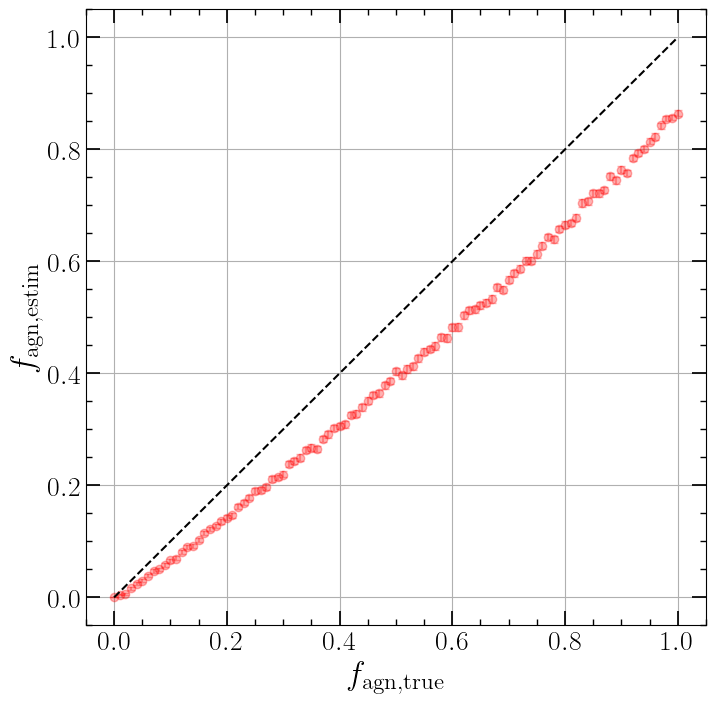

In [71]:
# def moving_average(data, window_size):
#     return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# window_size = 10
# smoothed_data = moving_average(estimated_fagns, window_size)

plt.figure(figsize=(8,8))
# plt.plot(true_fagns[(window_size - 1):], smoothed_data, label=f"Moving Average (window={window_size})", color='blue', zorder=3)
plt.errorbar(true_fagns, estimated_fagns, yerr=np.array([lowers, uppers]), capsize=3, linestyle='', marker='o', color='red', alpha=0.3)
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), linestyle='dashed', color='black', zorder=6)
plt.xlabel(r'$f_{\rm agn, true}$')
plt.ylabel(r'$f_{\rm agn, estim}$')
# plt.legend()
plt.grid()
plt.show()


In [32]:
# !pip install joblib

In [33]:
# import numpy as np
# from scipy.integrate import quad
# from joblib import Parallel, delayed
# from tqdm import tqdm

# xx = np.linspace(xmin, xmax, 1000)

# # Initialize log probabilities
# log_agn_probs = np.zeros(GWEvents.n_events)
# log_alt_probs = np.zeros(GWEvents.n_events)

# def compute_log_prob(i, event):
#     log_prob_agn = 0.0
#     log_prob_alt = 0.0
    
#     # Compute AGN probabilities
#     for Model in GWEvents.agn_models:
#         intrinsic_param_posterior = np.array(GWEvents.posteriors[Model.param_label].iloc[i])[0]
#         intrinsic_param_kde = kde(intrinsic_param_posterior)  # Precompute KDE

#         # Vectorized function for integration
#         def population_prior_times_posterior(x):
#             return Model.joint_prob(np.atleast_1d(x)) * intrinsic_param_kde(x)
        
#         # Integrate and use log-probabilities
#         log_prob_agn += np.log(quad(population_prior_times_posterior, xmin, xmax)[0] + 1e-300)  # Avoid log(0)

#     # Compute ALT probabilities
#     for Model in GWEvents.alt_models:
#         intrinsic_param_posterior = np.array(GWEvents.posteriors[Model.param_label].iloc[i])[0]
#         intrinsic_param_kde = kde(intrinsic_param_posterior)  # Precompute KDE

#         # Vectorized function for integration
#         def population_prior_times_posterior(x):
#             return Model.joint_prob(np.atleast_1d(x)) * intrinsic_param_kde(x)

#         # Integrate and use log-probabilities
#         log_prob_alt += np.log(quad(population_prior_times_posterior, xmin, xmax)[0] + 1e-300)

#     return log_prob_agn, log_prob_alt

# # Parallel processing across events
# results = Parallel(n_jobs=-1)(
#     delayed(compute_log_prob)(i, event) for i, event in enumerate(tqdm(range(GWEvents.n_events)))
# )

# # Unpack results
# log_agn_probs[:], log_alt_probs[:] = zip(*results)

# # Convert back from log-probabilities if needed
# agn_probs = np.exp(log_agn_probs)
# alt_probs = np.exp(log_alt_probs)
